#**Maestría en Inteligencia Artificial Aplicada**

##**Curso: Inteligencia Artificial y Aprendizaje Automático**

###Tecnológico de Monterrey

###Prof Luis Eduardo Falcón Morales

## **Adtividad de las Semanas 5 y 6**
###**Problema de asignación de créditos: South German Dataset.**

## **Nombre y matrícula:**

# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

## **Ejercicio 1**

In [198]:
#pip install xgboost

In [238]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import power_transform
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [200]:
# Cargamos los datos:

df = pd.read_csv("./south_german_credit/SouthGermanCredit.asc",sep=' ')
print(df.shape)
df.head(3)

(1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


In [201]:
# Renombra los nombres de las columnas del alemán al inglés y desplegamos de
# nuevo el DataFrame para ver el resultado obtenido:

# ************* Inlcuye aquí tu código:*****************************

# Rename columns
new_column_names = {'laufkont': 'status', 'laufzeit': 'duration', 'moral': 'credit_history',
                    'verw': 'purpose', 'hoehe':'amount', 'sparkont': 'savings', 'beszeit':'employment_duration',
                    'rate':'installment_rate', 'famges': 'personal_status_sex', 'buerge': 'other_debtors',
                    'wohnzeit':'present_residence', 'verm':'property', 'alter':'age', 'weitkred':'other_installment_plans',
                    'wohn':'housing', 'bishkred':'number_credits', 'beruf':'job', 'pers':'people_liable', 'telef':'telephone',
                    'gastarb':'foreign_worker', 'kredit':'credit_risk'}
df = df.rename(columns=new_column_names)

# *********** Aquí termina la sección de agregar código *************

df.head().T

,0,1,2,3,4
status,1,1,2,1,1
duration,18,9,12,12,12
credit_history,4,4,2,4,4
purpose,2,0,9,0,0
amount,1049,2799,841,2122,2171
savings,1,1,2,1,1
employment_duration,2,3,4,3,3
installment_rate,4,2,2,3,4
personal_status_sex,2,3,2,3,3
other_debtors,1,1,1,1,1


## **Ejercicio 2**

In [202]:
# Los datos originales tienen en la variable de salida "credit_risk" a la clase negativa (buen cliente) con el valor de 1
# y a la clase de interés positiva (mal cliente) con el valor de 0. Realiza a continuación una transformación para que la
# clase negativa (buen cliente) quede ahora con el valor de 0 y la clase positiva (mal cliente) quede con el valor de 1.

# ************* Inlcuye aquí tu código:*****************************

df['credit_risk'] = df['credit_risk'].map({0: 1, 1: 0})

# *********** Aquí termina la sección de agregar código *************


print(df['credit_risk'].value_counts())

0    700
1    300
Name: credit_risk, dtype: int64


## **Ejercicio 3**

In [203]:
# Realiza una partición de 70-15-15 en entrenamiento, validación y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Inlcuye aquí tu código:*****************************

Xtrain, XTestTemp, ytrain, ytestTemp = train_test_split(df.drop(columns=['credit_risk']), df['credit_risk'], test_size=0.30, random_state=1)
Xtest, Xval, ytest, yval = train_test_split(XTestTemp, ytestTemp, test_size=0.5, random_state=1)

# *********** Aquí termina la sección de agregar código *************

# Mostremos las dimensiones de la partición generada:
print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(700, 20) (700,)
(150, 20) (150,)
(150, 20) (150,)


## **Ejercicio 4**

### **Describe a continuación la información de cada variable: su descripción, el tipo de variable y para el caso de las categóricas, el total de niveles que tiene.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

### **Variables Categóricas:**

1.   status : Estado actual de la cuenta con el banco. (categorica)
        * 1 : no checking account
        * 2 : … < 0 DM 
        * 3 : 0<= … < 200 DM 
        * 4 : … >= 200 DM / salary for at least 1 year

2.   credit_history : Historial crediticio (categorica)
        * 0 : Demora en pagos anteriores.
        * 1 : Cuenta criticas o creditos en otro lado.
        * 2 : No ah solicitado credito/Pago creditos solicitados en tiempo y forma.
        * 3 : Pagos de creditos existentes son pagados en tiempo y forma.
        * 4 : Todos los pagos en este banco an sido pagados en tiempo y forma.

3.   savings : Ahorros del cliente en marco aleman Deutsche Mark(DM) (categorica)
        * 1 : Sin datos/No tiene cuenta de ahorro
        * 2 : … < 100 DM 
        * 3 : 100 <= … < 500 DM 
        * 4 : 500 <= … < 1000 DM 
        * 5 : … >= 1000 DM

4.   employment_duration : Duracion de empleo en la organizacion actual. (ordinal)
        * 1 : Desempleado
        * 2 : < 1 año 
        * 3 : 1 <= … < 4 años 
        * 4 : 4 <= … < 7 años 
        * 5 : >= 7 años

5.   installment_rate: tasa de cuotas(ordinal)
        * 1 : >= 35
        * 2 : 25 <= … < 35
        * 3 : 20 <= … < 25
        * 4 : < 20

6.   personal_status_sex : Sexo + estado civil (categorica)
        * 1 : varon : divociado/separado
        * 2 : femenina : no soltera o varon : soltero
        * 3 : varon : cazado/viudo
        * 4 : femenina : soltera

7.   other_debtors : otros deudores (categorica)
        * 1 : ninguno
        * 2 : co-solicitante
        * 3 : Aval

8.  present_residence: Tiempo de recidencia en el hogar actual.(ordinal)
       * 1 : < 1 año 
       * 2 : 1 <= … < 4 años 
       * 3 : 4 <= … < 7 años 
       * 4 : >= 7 años

9. property : Proiedades en posesion. (ordinal)
       * 1 : desconocido / no propiedades
       * 2 : carro u otro
       * 3 : sociedad de contruccion. Acuerdo de ahorro/Seguro de vida
       * 4 : Bienes raices

10. other_installment_plans : otros planes de instalaciones (categorica)
       * 1 : Bano
       * 2 : Tienda
       * 3 : ninguno

11. housing : Tipo de vivienda (categorica)
       * 1 : gratis
       * 2 : renta
       * 3 : propia

12. number_credits: Numero de creditos (ordinal)
       * 1 : 1
       * 2 : 2-3
       * 3 : 4-5
       * 4 : >= 6
       
13. job : Tipo de trabajo y experiencia. (ordinal)
       * 1 : Desempleado/sin habilidades - sin residencia
       * 2 : sin experiencia - residente
       * 3 : empleado con experiencia/official
       * 4 : Gerente/AutoEmpleado/Altamente Calificado

### **Variables Numéricas:**

1.   Id : Identificador de cada entrada.

2.   duration: Duracion del credito en meses. (quantitativa)

3.   amount : El monto total del credito.(quantitativa)

4.   Age = Edad del deudor.(quantitativa)

5.   people_liable : personas responsables (quantitative)
       * 1 : 3 o mas
       * 2 : 0 a 2
6.   telephone : (binario)
       * 1 : no
       * 2 : yes (under customer name)
7.   foreign_worker : Trabajador foraneo(binary)
       * 1 : Si
       * 2 : No
8.   credit_risk(binary)
       * 0 : bad
       * 1 : good
9.   purpose : Motivo de la solicitud del prestamo. (quantitativa)
        * 0 : others
        * 1 : car (new)
        * 2 : car (used)
        * 3 : furniture/equipment
        * 4 : radio/television
        * 5 : domestic appliances
        * 6 : repairs
        * 7 : education
        * 8 : vacation
        * 9 : retraining
        * 10 : business

### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 5**

### Análisis descriptivo de las variables usando el conjunto de entrenamiento.

### Incluye a continuación todo el código que consideres necesario para analizar las variables y decidir en dado caso qué transformaciones les estarías aplicando.

In [204]:
print(Xtrain.shape)

(700, 20)


In [205]:
print(Xtrain.dtypes)

status                     int64
duration                   int64
credit_history             int64
purpose                    int64
amount                     int64
savings                    int64
employment_duration        int64
installment_rate           int64
personal_status_sex        int64
other_debtors              int64
present_residence          int64
property                   int64
age                        int64
other_installment_plans    int64
housing                    int64
number_credits             int64
job                        int64
people_liable              int64
telephone                  int64
foreign_worker             int64
dtype: object


In [206]:
print(Xtrain.describe())

           status    duration  credit_history     purpose        amount  \
count  700.000000  700.000000      700.000000  700.000000    700.000000   
mean     2.607143   20.711429        2.551429    2.778571   3273.401429   
std      1.257290   12.072605        1.099583    2.727143   2817.434038   
min      1.000000    4.000000        0.000000    0.000000    250.000000   
25%      1.000000   12.000000        2.000000    1.000000   1376.750000   
50%      2.000000   18.000000        2.000000    2.000000   2335.000000   
75%      4.000000   24.000000        4.000000    3.000000   3935.500000   
max      4.000000   72.000000        4.000000   10.000000  18424.000000   

          savings  employment_duration  installment_rate  personal_status_sex  \
count  700.000000           700.000000        700.000000           700.000000   
mean     2.125714             3.340000          2.965714             2.700000   
std      1.592605             1.197924          1.121501             0.698455   


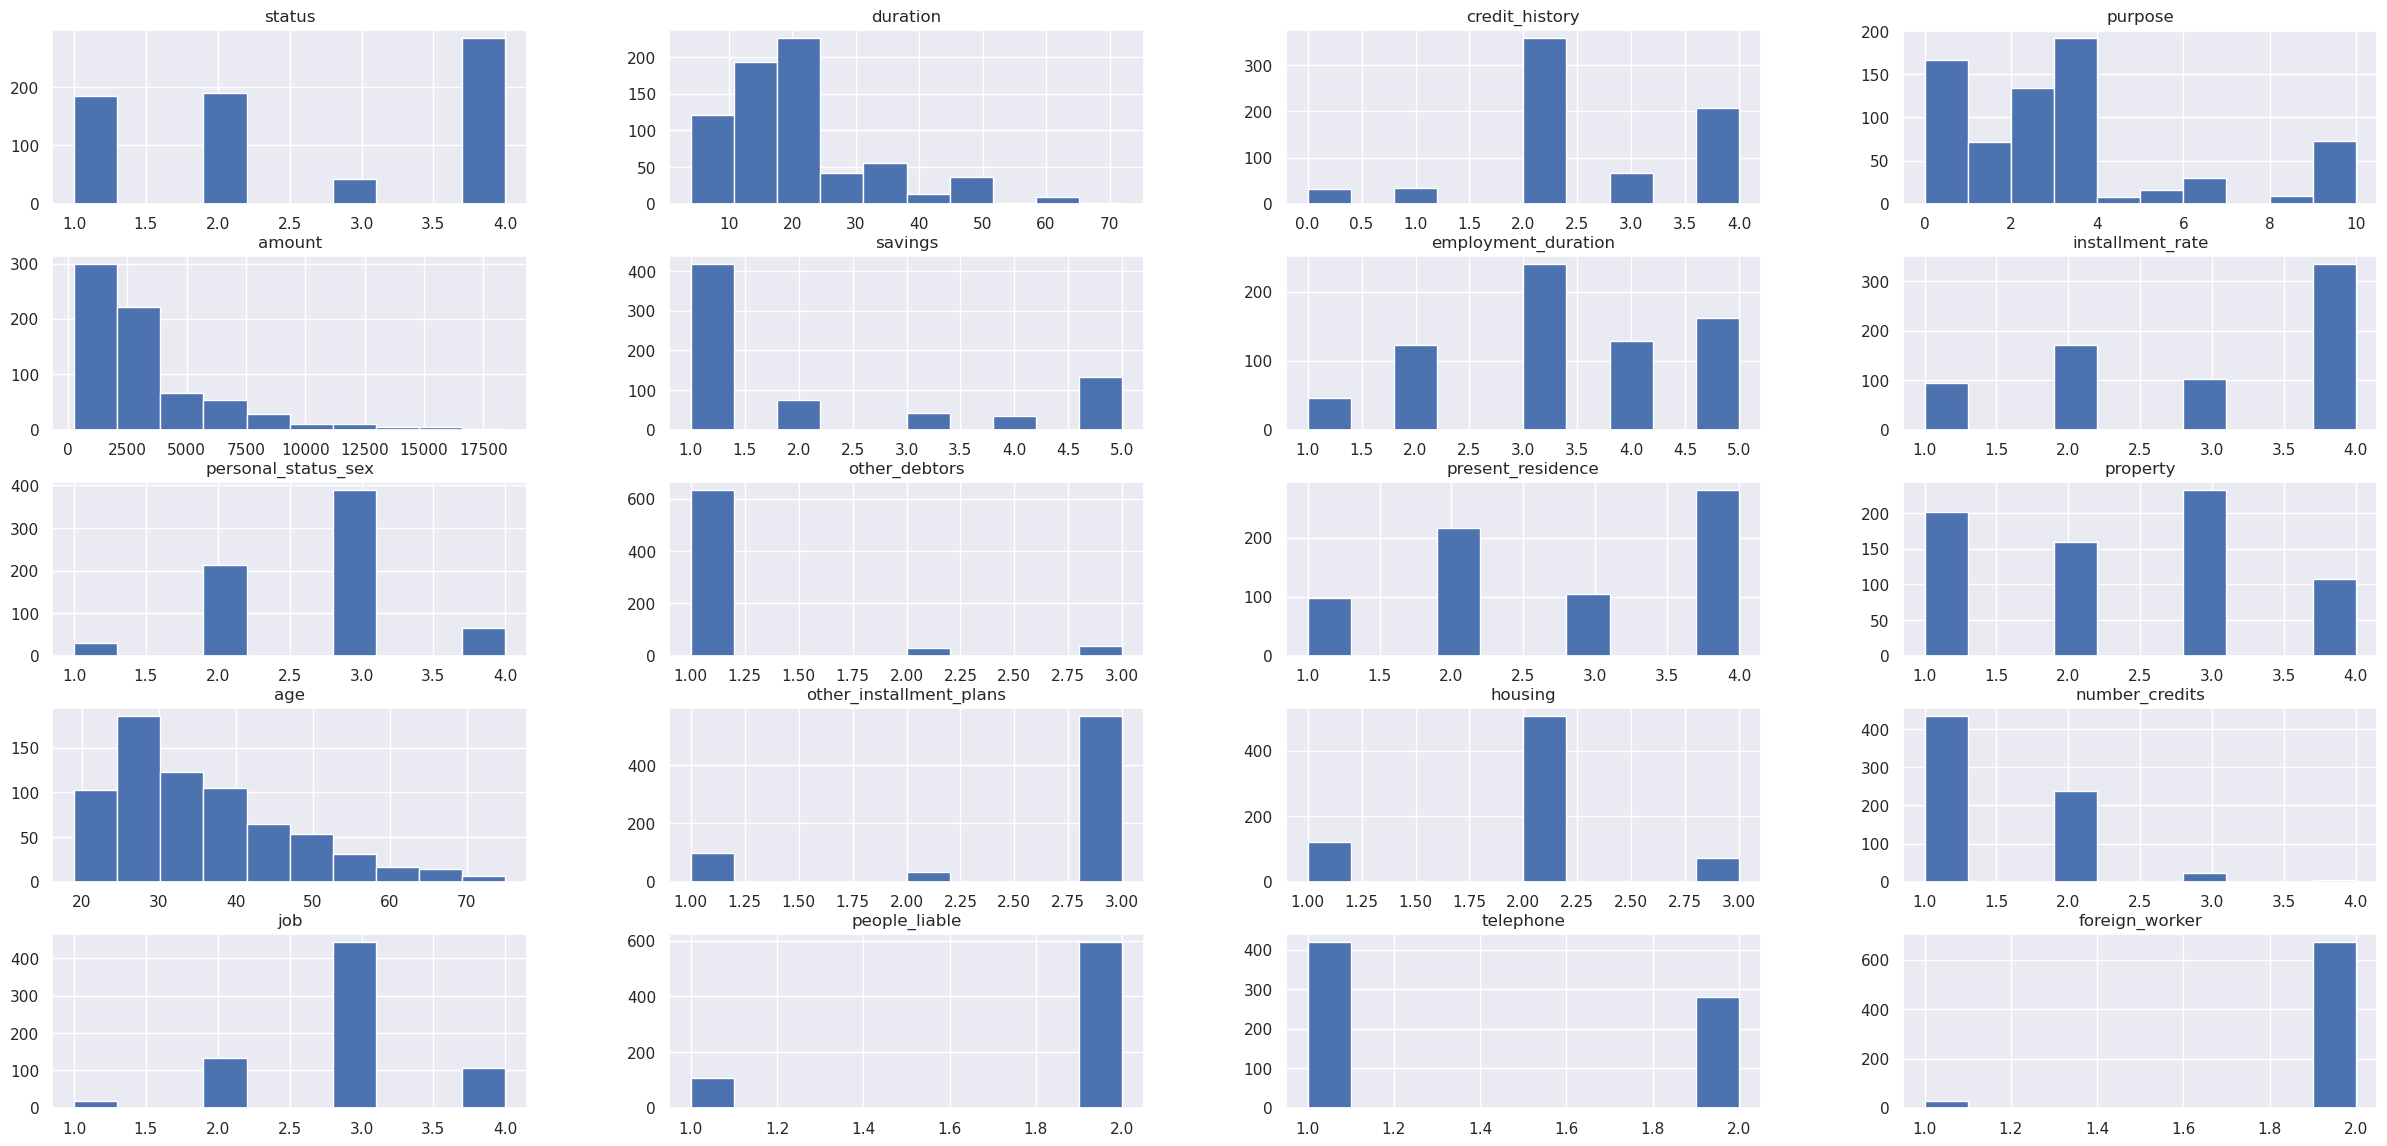

In [207]:


 # Puedes incluir a continuación todas las celdas de código que requieras....

Xtrain.hist(figsize=(30,14))
plt.show()


<AxesSubplot: >

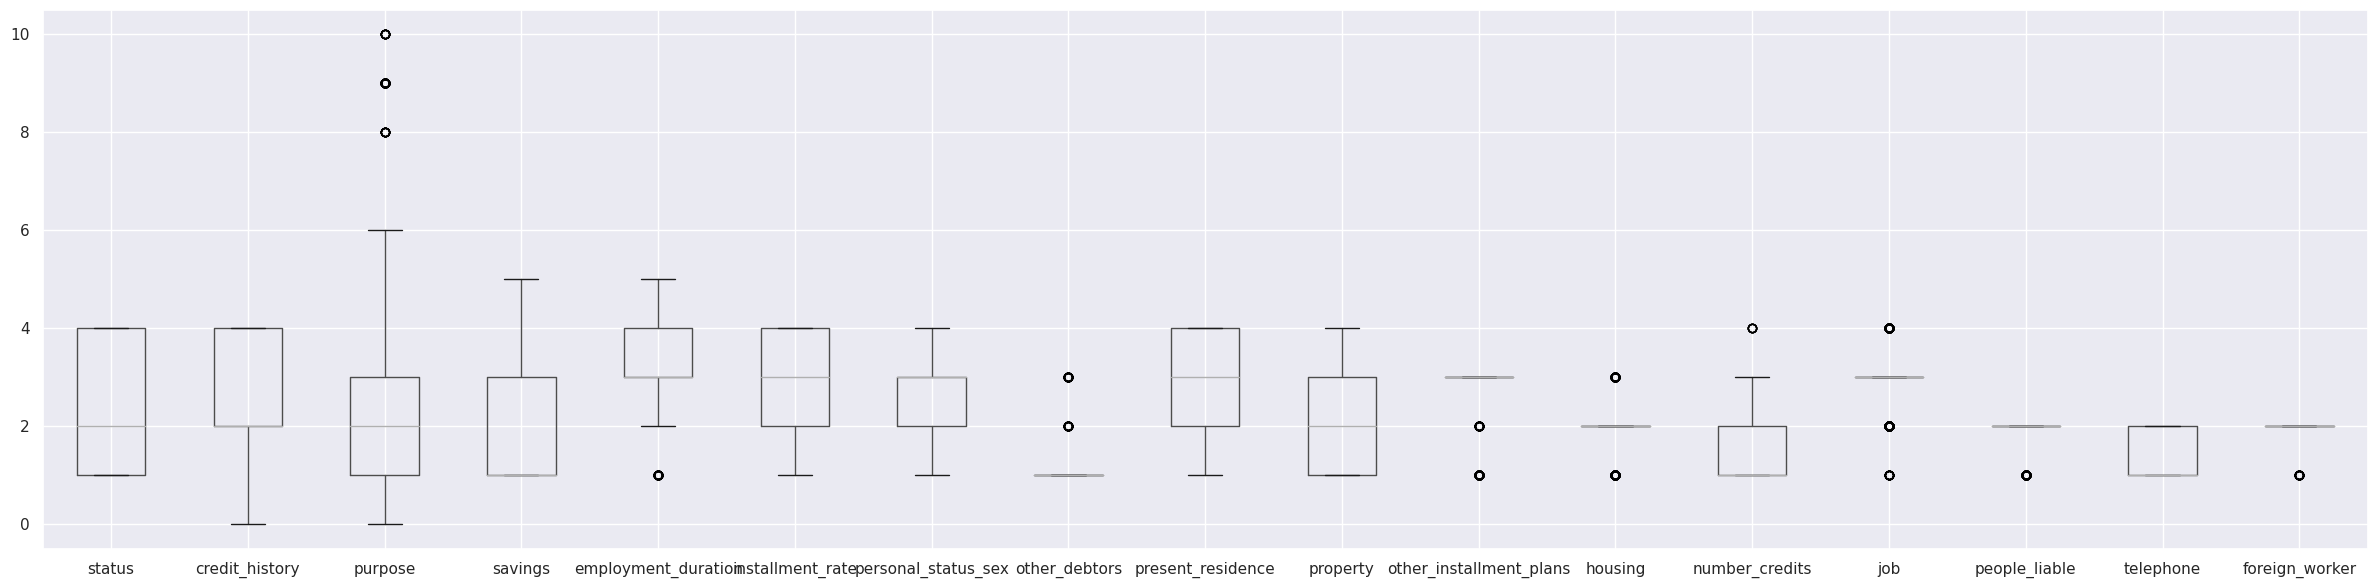

In [208]:
columns_to_plot = [col for col in Xtrain.columns if col != 'amount']
columns_to_plot = [col for col in Xtrain[columns_to_plot] if col != 'age']
columns_to_plot = [col for col in Xtrain[columns_to_plot] if col != 'duration']
Xtrain[columns_to_plot].boxplot(figsize=(30,7))

In [209]:
#scalar = MinMaxScaler()
#columns_to_scale = ['amount','age', 'duration']
#Xtrain[columns_to_scale] = scalar.fit_transform(Xtrain[columns_to_scale])

In [210]:
print(df.isnull().sum())

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64


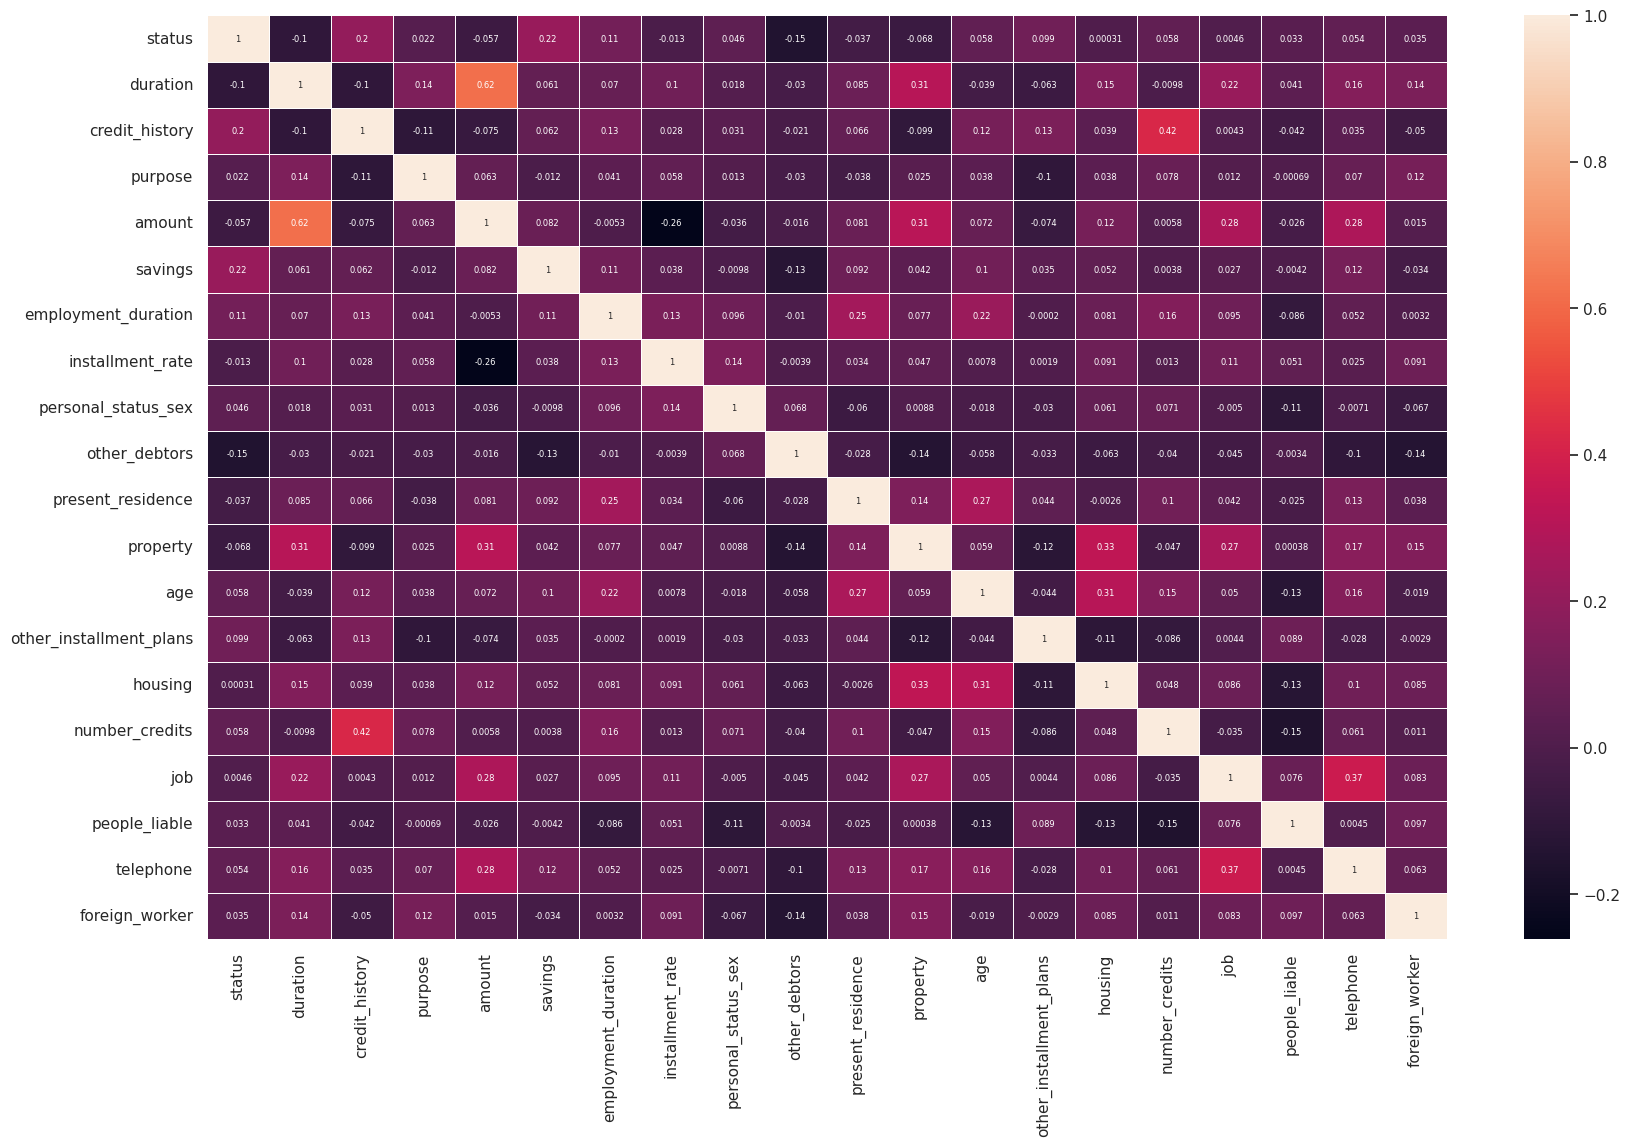

In [211]:
sns.set(rc={'figure.figsize':(20,12)})
merge = Xtrain
#merge.insert(1, "Attrition", ytrainT, True)
Tcorrelation = merge.corr(method='pearson', numeric_only=True)
sns.heatmap(Tcorrelation,xticklabels=Tcorrelation.columns,
            yticklabels=Tcorrelation.columns, annot=True, annot_kws={"size": 6}, linewidth=.5, vmax=1.0)

plt.show()

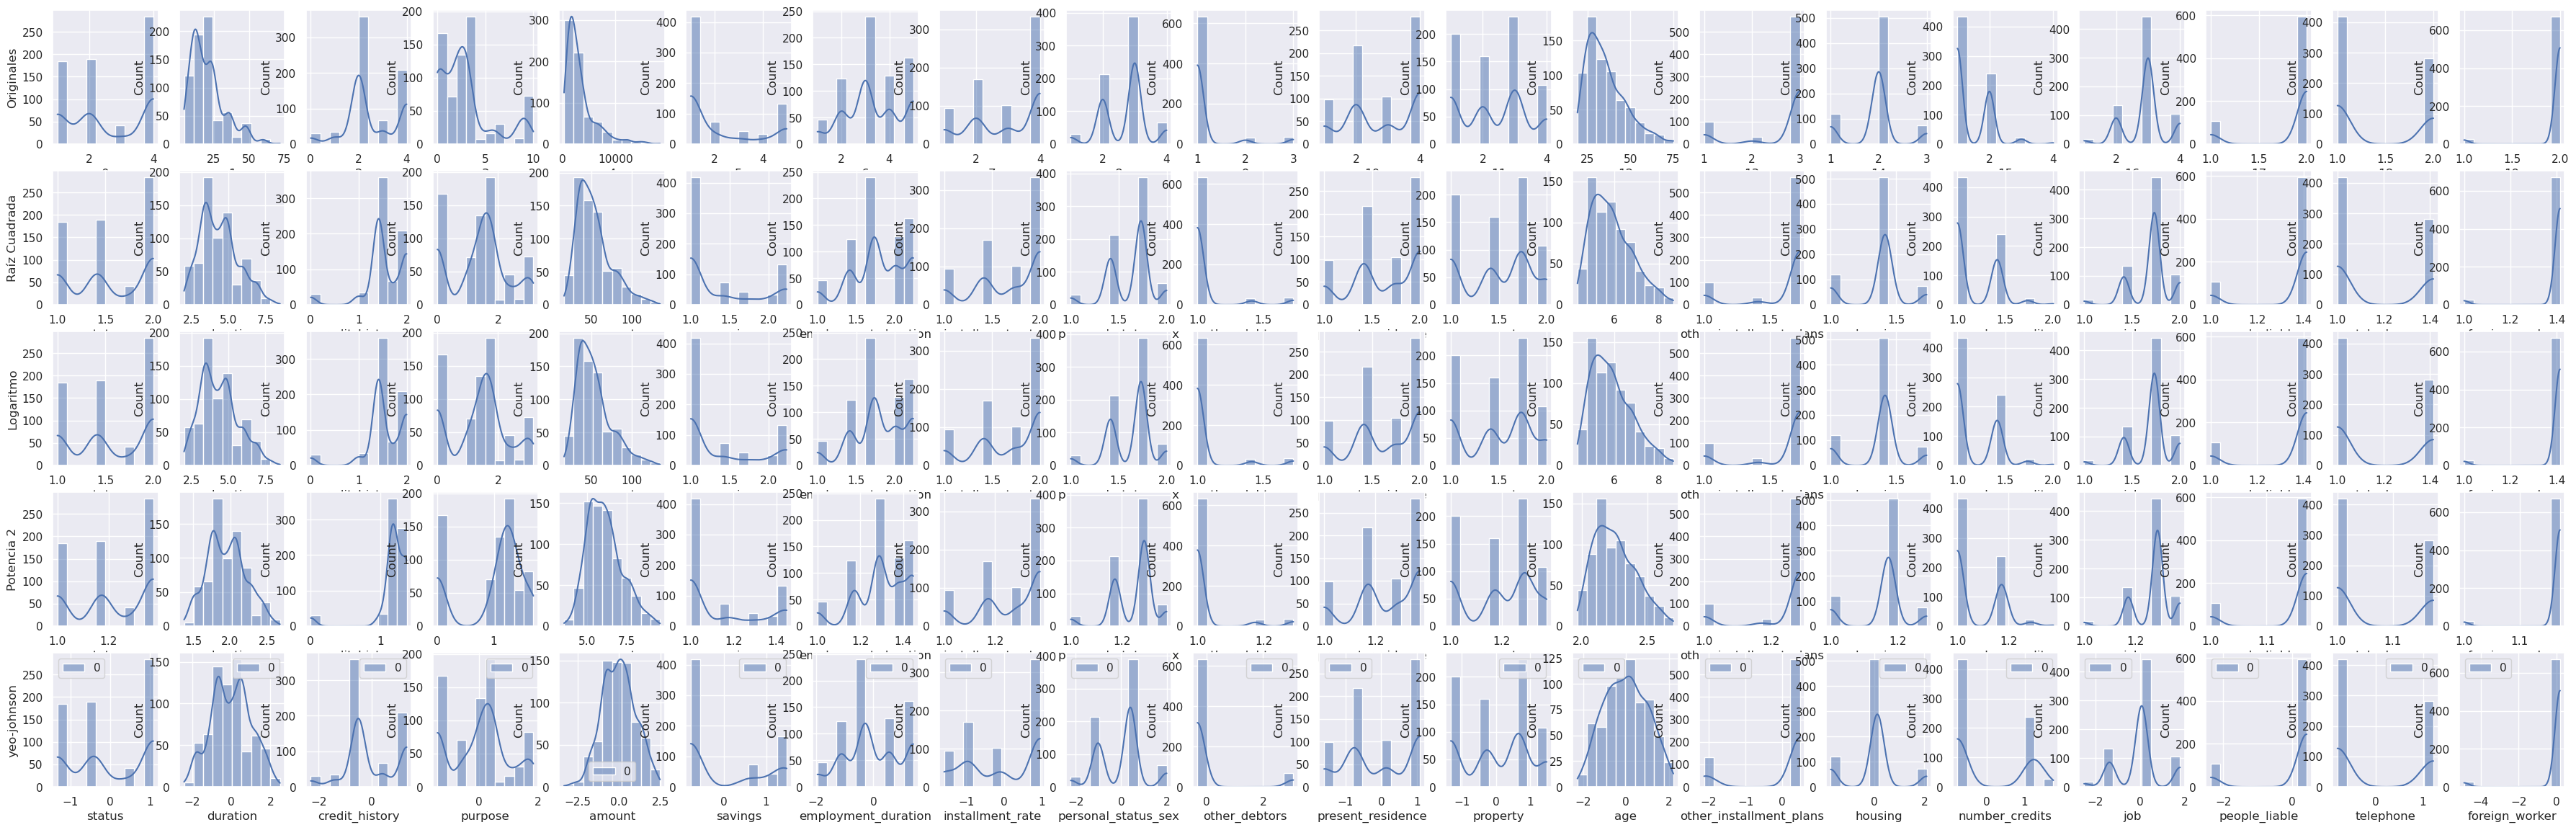

In [212]:
sns.set(rc={'figure.figsize':(45,14)})


columns = len(Xtrain.columns)
fig, axes = plt.subplots(5, columns)

for k, column in enumerate(Xtrain.columns):

    # Datos originales ---------------------------------------------------------
    plt.subplot(5,columns,k+1)

    Transf0 = Xtrain[column]         #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
    sns.histplot(Transf0, bins=10, kde=True)                             #  En este línea agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).


    plt.xlabel(k)
    if k==0:
      plt.ylabel('Originales')



    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(5,columns,k+columns+1)

    Transf1 = np.sqrt(Xtrain[column])   #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
    sns.histplot(Transf1, bins=10, kde=True)                                #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).


    plt.xlabel(column)
    if k==0:
      plt.ylabel('Raíz Cuadrada')



    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(5,columns,k+columns*2+1)

    Transf2 = np.log(Xtrain[column]+1)  #  En esta línea se debe aplicar el logaritmo natural a los valores de cada variable "k" sin transformar.
    sns.histplot(Transf1, bins=10, kde=True)                              #  En este línea agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).


    plt.xlabel(column)
    if k==0:
      plt.ylabel('Logaritmo')



    # Datos transformados con la potencia de 2 ---------------------------------
    plt.subplot(5,columns,k+columns*3+1)

    Transf3 = np.power(Xtrain[column], .23)  #  En esta línea debes elevar al cuadrado los valores de cada variable "k" sin transformar.
    sns.histplot(Transf3, bins=10, kde=True)                               #  En este línea agrega el comando para obtener el histograma de Transf3 con 20 barras (bins).


    plt.xlabel(column)
    if k==0:
      plt.ylabel('Potencia 2')


    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(5,columns,k+columns*4+1)

    Transf4 = power_transform(Xtrain[column].values.reshape(-1,1), method='yeo-johnson') #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.
    sns.histplot(Transf4, bins=10, kde=True)                    #  En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).


    plt.xlabel(column)
    if k==0:
      plt.ylabel('yeo-johnson')

    # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
    ################################################################################################################


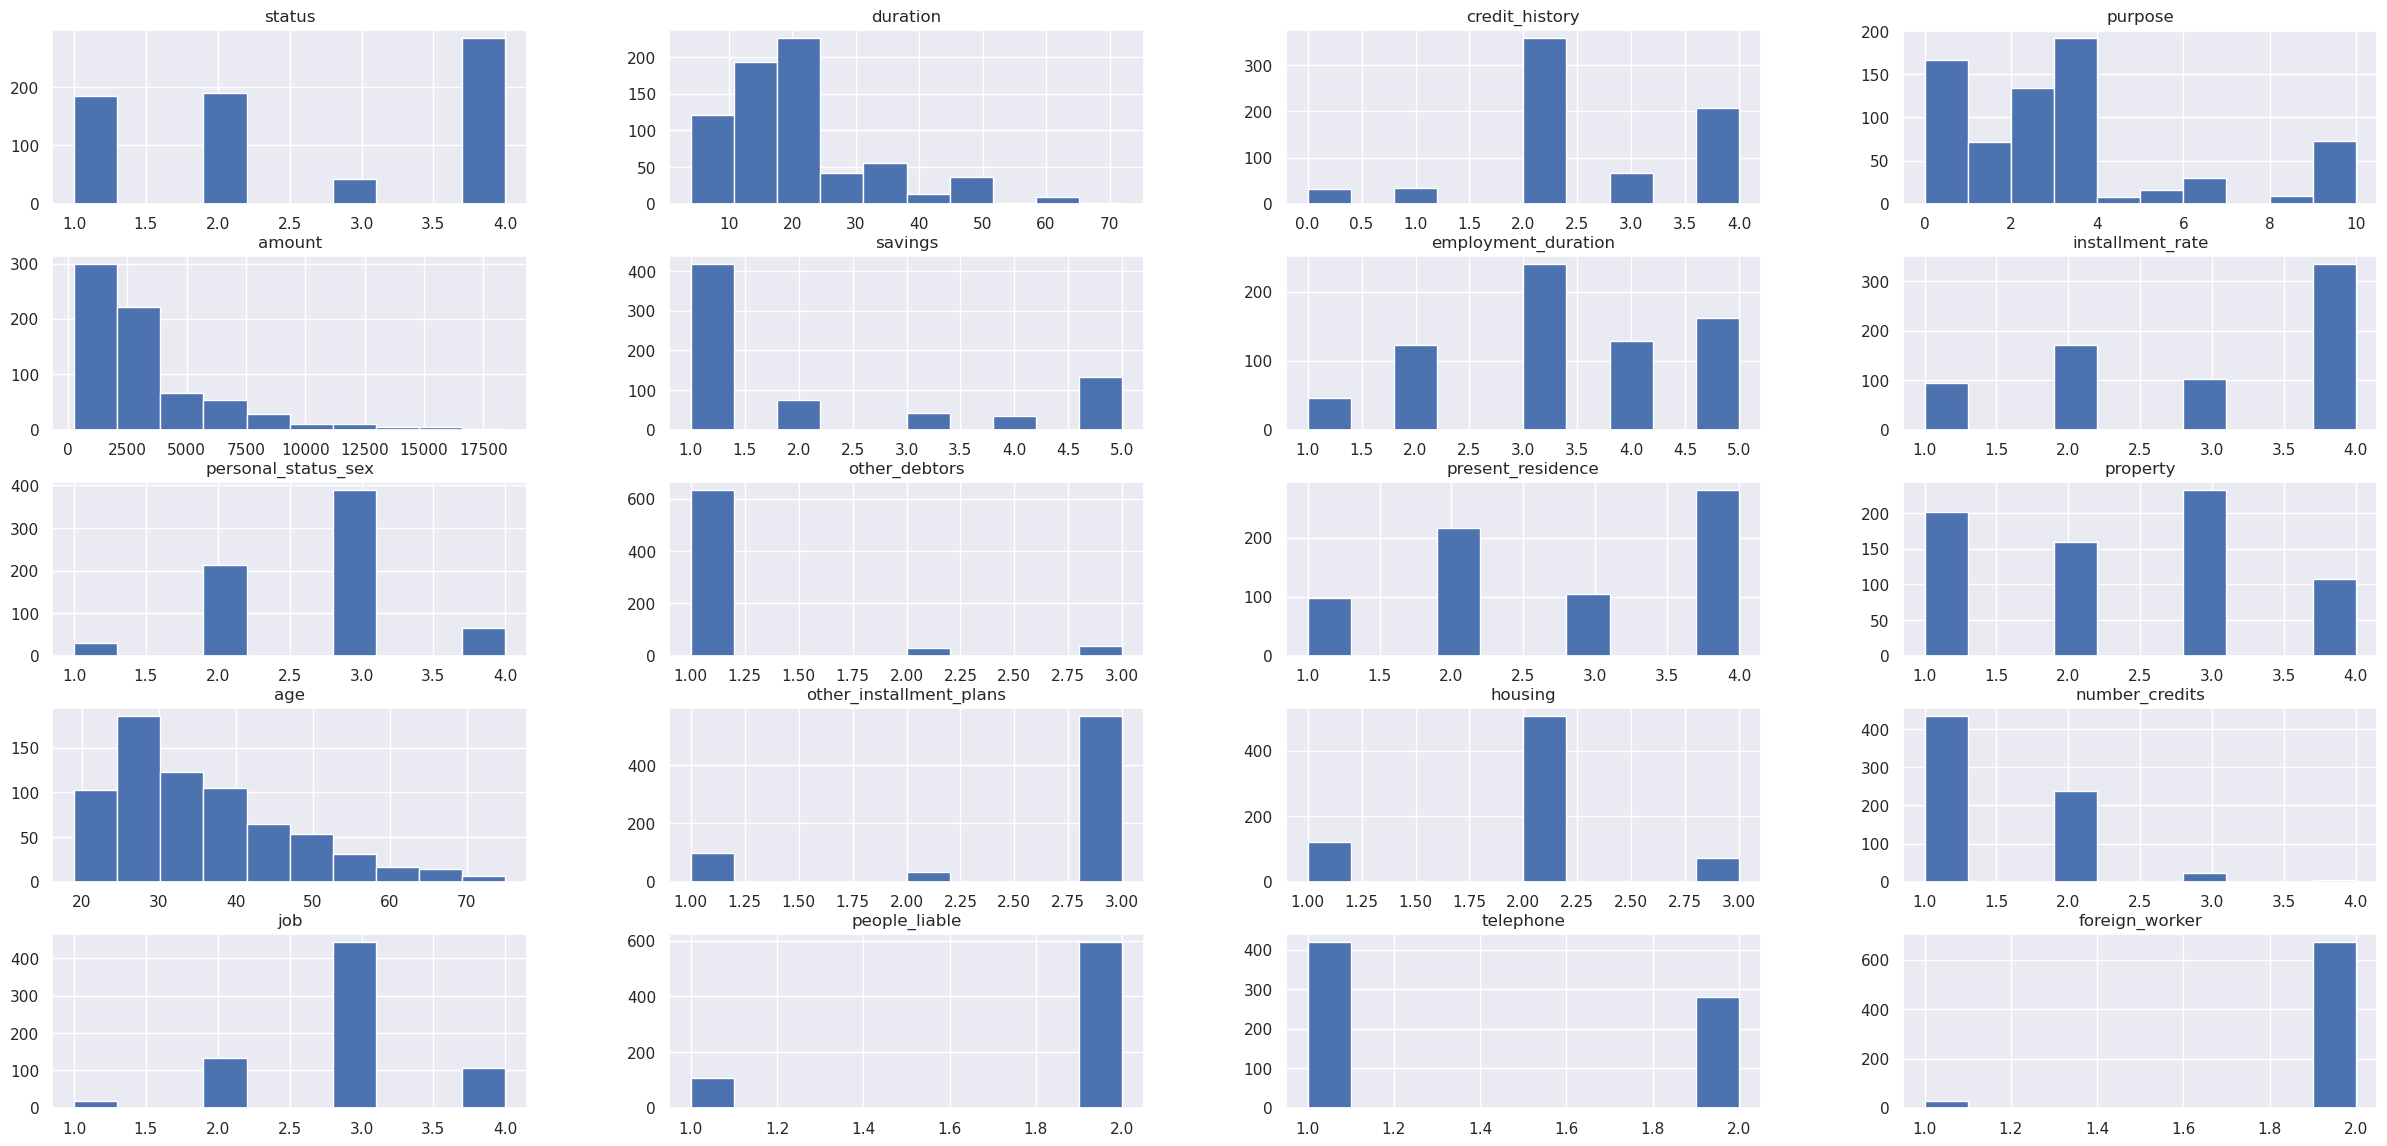

In [213]:
 # Puedes incluir a continuación todas las celdas de código que requieras....
Xtrain.hist(figsize=(30,14))
plt.show()


### **Describe y explica a continuación las transformaciones que has decidido aplicar a cada columna:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


* status: 
* duration: StandarScaler La escala de medicion de tiempo en meses tambien debe ser transformada.
* credit_history: One-hot encoder, queremos que estas columnas no se confunda la categoria con una magnitud,teniendo una columna por valor esto solo indicara la presencia o la ausencia de esta categoria. 
* purpose: One-hot encoder
* amount: StandardScaler porque no se ve afectado por valores atipicos, esta columna tiene mucho valor atipico. El escalado para poder medir con la misma escala
* savings: StandardScaler, escalarlo para poder medir en la misma escal, tra distribucion mejorara con media en 0 y desviacion standar en 1.
* employment-duration: One-hot encoder
* installment-rate: One-hot encoder
* personal_status_sex: One-hot encoder
* other_debtors: One-hot encoder
* present_residence: One-hot encoder no es una magnitud de años, si no una categoria que indica un rango de aaños.
* property: One-hot encoder
* age: StandardScaler la escala, insisto debemos tener el mismo rango.
* other_installment_plans: One-hot encoder
* housing: One-hot encoder
* number_of_credits: StandardScaler
* job: One-hot encoder
* people_liable: StandardScaler

### ++++++++ Termina la sección de agregar texto. +++++++++++


# **Parte II: Modelos de aprendizaje automático con los conjuntos originales de la partición realizada.**

## **Ejercicio 6**

In [214]:
# Transformaciones que se aplicarán a las variables numéricas usando la clase Pipeline de sklearn:

# ************* Inlcuye aquí tu código:*****************************

# Variables numéricas:

num_pipe = Pipeline(steps = [
    ('scale', StandardScaler())
])
num_pipe_nombres = ['duration', 'amount', 'savings', 'age', 'number_credits', 'people_liable']

# Variables categóricas:
cat_pipe = Pipeline(steps = [
    ('one-hot-enocder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
cat_pipe_nombres = ['credit_history', 'purpose', 'employment_duration', 'installment_rate',
                     'personal_status_sex','other_debtors', 'present_residence',
                     'property', 'other_installment_plans', 'housing', 'job']


# Conjuntemos las transformaciones de todo tipo de variable y en dado caso
# deja inaletardas aquellas que hayas decidido no transformar:

columnasTransformer = ColumnTransformer(transformers= [
    ('num_pipe', num_pipe, num_pipe_nombres),
    ('cat_pip', cat_pipe, cat_pipe_nombres),
],
    remainder='drop',
    n_jobs=-1
)

# *********** Aquí termina la sección de agregar código *************




## **Ejercicio 7**

In [215]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento y validación
# en uno nuevo aumentado que llamaremos trainval para utilizar como entrenamiento:

# ************* Inlcuye aquí tu código:**************************

Xtrainval = pd.concat([Xtrain, Xval], ignore_index=True)
ytrainval = pd.concat([ytrain, yval], ignore_index=True)
# *********** Aquí termina la sección de agregar código *************


print(Xtrainval.shape, ytrainval.shape)

(850, 20) (850,)


## **Ejercicio 8**

In [216]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.
# Por el momento todas tienen sus argumentos predeterminados, pero deberás
# ajustarlos de manera que todos los modelos converjan durante el entrenamiento
# y puedas comparar cuál o cuáles de ellos son los mejores modelos.

def mis_modelos():
  modelos, nombres = list(), list()

  # ************* Inlcuye aquí tu código:**************************
  #
  # Deberás incluir en cada modelo los argumentos que consideres
  # adecuados para que cada uno converja. En dado caso una decisión
  # puede ser que un modelo tenga simplemente los valores de sus
  # hiperparámetros con los predeterminados.
  # Consulta en dado caso la documentación de cada modelo para
  # la identificación de los hiperparámetros que desees ajustar.


  # Regresión Logística:
  modelos.append(LogisticRegression(max_iter=1000, class_weight={0: 1, 1: 10} ))
  nombres.append('LR')

  # k-Vecinos más Cercanos:
  modelos.append(KNeighborsClassifier( n_neighbors=3, metric='euclidean', weights='uniform', algorithm='brute' ))
  nombres.append('kNN')

  # Árbol de decisiones:
  modelos.append(DecisionTreeClassifier(max_depth=2, min_samples_split=5, random_state=42 ))
  nombres.append('DTree')

  modelos.append(RandomForestClassifier(n_estimators= 100,    # 100
                                      max_depth= None,      # None, 1, 2,3, 4, 5, 6 ... ¿Se esperaría la misma profunidad en un RF y en un DT?
                                      min_samples_split=2,    # 2, 5, 15
                                      #random_state=0
                                      ))
  nombres.append('RF')

  # XGBoosting:
  modelos.append(XGBClassifier( n_estimators=100,  # Número de árboles en el bosque
    max_depth=3,       # Profundidad máxima de cada árbol
    learning_rate=0.1, # Tasa de aprendizaje
    gamma=0,           # Parámetro de regularización
    subsample=0.8,     # Proporción de muestras utilizadas para entrenar cada árbol
    colsample_bytree=0.8, # Proporción de características utilizadas para entrenar cada árbol
    random_state=42 ))
  nombres.append('XGBoost')

  modelos.append(MLPClassifier(hidden_layer_sizes=(30,),     # 100,  6, 24, 30, (15,15), (50,50)
                              activation='logistic',
                              max_iter=1000,                  # 200,
                              alpha=0.0001,               # término de regularización L2.
                              #learning_rate='constant',       # tasa de aprendizaje o tamaño de paso del método Gradiente Descendente.
                              #learning_rate_init=0.001,
                              #random_state=1
                              ))
  nombres.append('MLP')



  # Máquina de Vector Soporte : Support Vector Machine
  # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

  modelos.append(SVC(kernel='rbf',
                     C= 1.0,      # 1.0, 0.00001, 1000           # inversamente proporcional a la constante de regularización L2.
                     gamma= 'scale',           # scale,  0.005
                     #class_weight='balanced',     # Siempre puedes hacer uso del balanceo en caso de que ayude.
                     #random_state=7
                     ))
  nombres.append('SVM')



  # *********** Aquí termina la sección de agregar código *************

  return modelos, nombres






# Entrenemos cada uno de los modelos y desplegamos la métricas de Train y Val.

# NOTA: Observa que el método de Validación-Cruzada llama  a los resultados
#       de "validation" como "test":

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'roc_auc': 'roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

>> LR
	 test_accuracy 0.472 (0.026)
	 train_accuracy 0.506 (0.017)
	 test_precision 0.347 (0.012)
	 train_precision 0.370 (0.009)
	 test_recall 0.905 (0.043)
	 train_recall 0.972 (0.007)
	 test_f1 0.501 (0.017)
	 train_f1 0.536 (0.010)
	 test_roc_auc 0.713 (0.041)
	 train_roc_auc 0.802 (0.008)
>> kNN
	 test_accuracy 0.686 (0.020)
	 train_accuracy 0.820 (0.010)
	 test_precision 0.440 (0.055)
	 train_precision 0.768 (0.024)
	 test_recall 0.265 (0.061)
	 train_recall 0.551 (0.027)
	 test_f1 0.328 (0.060)
	 train_f1 0.641 (0.022)
	 test_roc_auc 0.624 (0.035)
	 train_roc_auc 0.891 (0.006)


/home/mitnik/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mitnik/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>> DTree
	 test_accuracy 0.707 (0.022)
	 train_accuracy 0.735 (0.014)
	 test_precision 0.470 (0.154)
	 train_precision 0.626 (0.219)
	 test_recall 0.206 (0.119)
	 train_recall 0.274 (0.139)
	 test_f1 0.271 (0.144)
	 train_f1 0.351 (0.159)
	 test_roc_auc 0.592 (0.030)
	 train_roc_auc 0.646 (0.018)
>> RF
	 test_accuracy 0.733 (0.012)
	 train_accuracy 1.000 (0.000)
	 test_precision 0.615 (0.058)
	 train_precision 1.000 (0.000)
	 test_recall 0.245 (0.062)
	 train_recall 1.000 (0.000)
	 test_f1 0.345 (0.059)
	 train_f1 1.000 (0.000)
	 test_roc_auc 0.721 (0.029)
	 train_roc_auc 1.000 (0.000)
>> XGBoost
	 test_accuracy 0.736 (0.024)
	 train_accuracy 0.877 (0.007)
	 test_precision 0.581 (0.068)
	 train_precision 0.919 (0.019)
	 test_recall 0.354 (0.081)
	 train_recall 0.637 (0.022)
	 test_f1 0.435 (0.071)
	 train_f1 0.752 (0.016)
	 test_roc_auc 0.727 (0.046)
	 train_roc_auc 0.950 (0.005)


/home/mitnik/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mitnik/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mitnik/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mitnik/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mitnik/.local/lib/python3.11/site-pack

>> MLP
	 test_accuracy 0.731 (0.031)
	 train_accuracy 0.819 (0.047)
	 test_precision 0.568 (0.080)
	 train_precision 0.767 (0.092)
	 test_recall 0.404 (0.063)
	 train_recall 0.538 (0.109)
	 test_f1 0.468 (0.051)
	 train_f1 0.631 (0.105)
	 test_roc_auc 0.723 (0.039)
	 train_roc_auc 0.856 (0.063)
>> SVM
	 test_accuracy 0.747 (0.017)
	 train_accuracy 0.839 (0.009)
	 test_precision 0.705 (0.105)
	 train_precision 0.963 (0.017)
	 test_recall 0.245 (0.041)
	 train_recall 0.467 (0.036)
	 test_f1 0.361 (0.051)
	 train_f1 0.628 (0.032)
	 test_roc_auc 0.737 (0.032)
	 train_roc_auc 0.947 (0.005)


## **Ejercicio 9**

### **De acuerdo a la información de la matriz de costo dada en la documentación del problema, contesta las siguientes preguntas:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

a.   ¿Qué error se considera más costoso por parte del banco? ¿FP o FN? Justifica tu respuesta.
* Considero que un falso negativo es mas costoso ya que clasificas a un mal cliente como uno bueno. El clasificarlo como bueno el prestamo se le dara, con el riesgo de que no liquide su deuda, es mejor no darle el credito a un buen cliente que darselo a un mal cliente. 

b.   ¿Cuál o cuál serían entonces las métricas a considerar como más importantes? Justifica tu respuesta.
* Recall



c.   Investiga qué otras métricas se pudieran considerar, de la gran familia de métricas que existen.
* F1-Score
* Accuracy

### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 10**

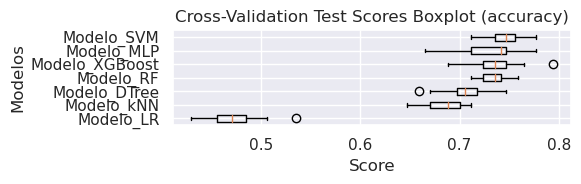

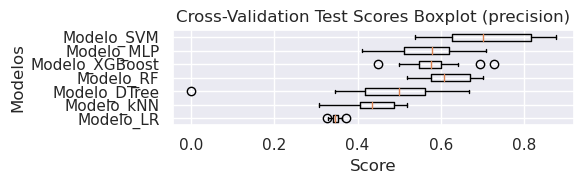

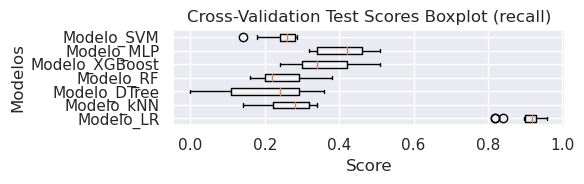

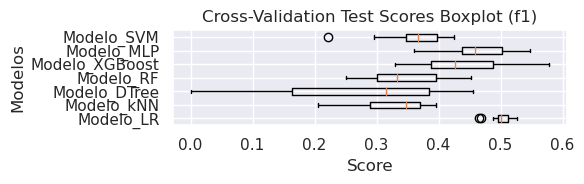

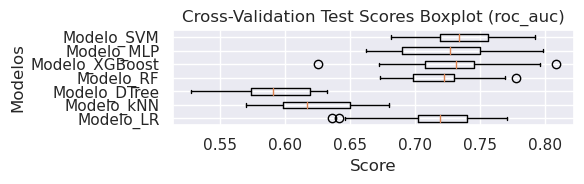

In [217]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos,
# utilizando los resultados obtenidos con la métrica que consideraste más importante
# en el ejercicio anterior:


# ************* Inlcuye aquí tu código:**************************

# Crear un diagrama de caja para visualizar la distribución de las probabilidades predichas

# Crear un diagrama de caja para visualizar la distribución de las probabilidades predichas

test_scores_por_modelo = {metric: {f'Modelo_{nombres[i]}': [] for i in range(len(modelos))} for metric in mismetricas}

# Extract and organize test scores for each metric and each model
for i, scores_por_modelo in enumerate(resultados):
    for metric, scoring_name in mismetricas.items():
        if f'test_{scoring_name}' in scores_por_modelo:
            test_scores_por_modelo[metric][f'Modelo_{nombres[i]}'].extend(scores_por_modelo[f'test_{scoring_name}'])

# Create boxplots for each metric
for metric, scores_por_modelo in test_scores_por_modelo.items():
    plt.figure(figsize=(6, 2))
    plt.boxplot(scores_por_modelo.values(), labels=scores_por_modelo.keys(), vert=False)
    plt.title(f'Cross-Validation Test Scores Boxplot ({metric})')
    plt.xlabel('Score')
    plt.ylabel('Modelos')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Crear el diagrama de caja


# *********** Aquí termina la sección de agregar código *************


# **Parte III: Modelos con técnicas para clases no balanceadas.**

## **Ejercicio 11**

In [218]:
# Selecciona una técnica de sobremuestreo, submuestreo o sobremuestreo+submuestreo para
# clases no balanceadas que consideres adecuada, en combinación con los tres mejores modelos
# de la Parte II, para entrenar y desplegar todas las métricas que se desplegaron en la Parte II.

# ************* Inlcuye aquí tu código:**************************

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(Xtrain, ytrain)

def mis_modelos():
  modelos, nombres = list(), list()

  # Regresión Logística:
  modelos.append(LogisticRegression(max_iter=1000, class_weight={0: 1, 1: 10} ))
  nombres.append('LR')

  modelos.append(MLPClassifier(hidden_layer_sizes=(30,),     # 100,  6, 24, 30, (15,15), (50,50)
                              activation='logistic',
                              max_iter=1000,                  # 200,
                              alpha=0.0001,               # término de regularización L2.
                              #learning_rate='constant',       # tasa de aprendizaje o tamaño de paso del método Gradiente Descendente.
                              #learning_rate_init=0.001,
                              #random_state=1
                              ))
  nombres.append('MLP')

  # Máquina de Vectores de Soporte:
  modelos.append(SVC( C=1.0, kernel='rbf', gamma='scale', probability=True, random_state=42 ))
  nombres.append('SVM')


  return modelos, nombres

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'roc_auc': 'roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          X_resampled,
                          y_resampled,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

test_scores_por_modelo = {metric: {f'Modelo_{nombres[i]}': [] for i in range(len(modelos))} for metric in mismetricas}



>> LR
	 test_accuracy 0.608 (0.014)
	 train_accuracy 0.626 (0.011)
	 test_precision 0.563 (0.009)
	 train_precision 0.572 (0.008)
	 test_recall 0.974 (0.020)
	 train_recall 0.996 (0.002)
	 test_f1 0.713 (0.008)
	 train_f1 0.727 (0.006)
	 test_roc_auc 0.828 (0.033)
	 train_roc_auc 0.866 (0.008)


/home/mitnik/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mitnik/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mitnik/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mitnik/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mitnik/.local/lib/python3.11/site-pack

>> MLP
	 test_accuracy 0.770 (0.029)
	 train_accuracy 0.847 (0.061)
	 test_precision 0.781 (0.033)
	 train_precision 0.854 (0.062)
	 test_recall 0.753 (0.040)
	 train_recall 0.837 (0.063)
	 test_f1 0.766 (0.031)
	 train_f1 0.845 (0.062)
	 test_roc_auc 0.839 (0.024)
	 train_roc_auc 0.921 (0.050)
>> SVM
	 test_accuracy 0.777 (0.029)
	 train_accuracy 0.893 (0.005)
	 test_precision 0.795 (0.030)
	 train_precision 0.912 (0.007)
	 test_recall 0.746 (0.043)
	 train_recall 0.870 (0.007)
	 test_f1 0.769 (0.032)
	 train_f1 0.891 (0.005)
	 test_roc_auc 0.861 (0.022)
	 train_roc_auc 0.960 (0.003)


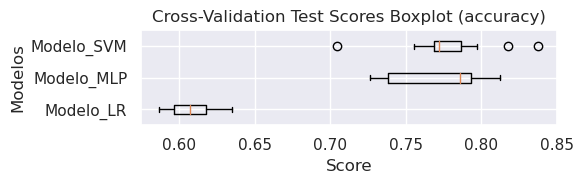

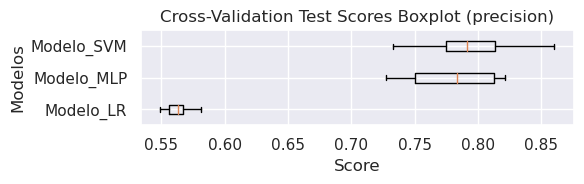

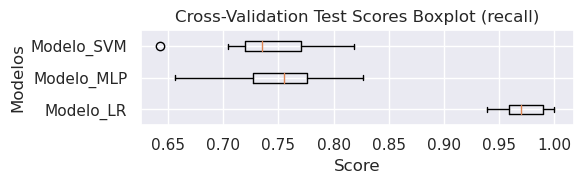

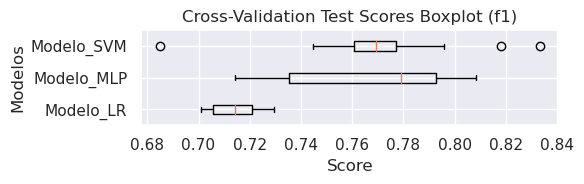

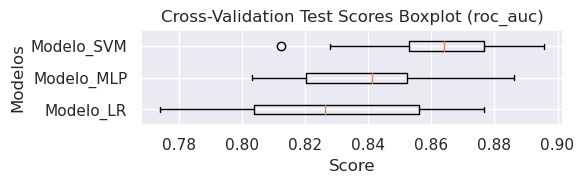

In [219]:
# Extract and organize test scores for each metric and each model
for i, scores_por_modelo in enumerate(resultados):
    for metric, scoring_name in mismetricas.items():
        if f'test_{scoring_name}' in scores_por_modelo:
            test_scores_por_modelo[metric][f'Modelo_{nombres[i]}'].extend(scores_por_modelo[f'test_{scoring_name}'])

# Create boxplots for each metric
for metric, scores_por_modelo in test_scores_por_modelo.items():
    plt.figure(figsize=(6, 2))
    plt.boxplot(scores_por_modelo.values(), labels=scores_por_modelo.keys(), vert=False)
    plt.title(f'Cross-Validation Test Scores Boxplot ({metric})')
    plt.xlabel('Score')
    plt.ylabel('Modelos')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# *********** Aquí termina la sección de agregar código *************

# **Parte IV: Mejor modelo**

## **Ejercicio 12**

### **Selecciona y justifica cuál consideras es el mejor modelo que has obtenido hasta ahora.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++
Elegí utilizar logistic regresion, al ejecutar la validación cruzada con los mejores hiperparámetros todos disminuían el valor que, en este caso, nos interesa el recall. Los demás modelos eran demasiado complejos y no me entregaron mejores resultados. LR me retorna valores balanceados y con buen score. No está sobre entrenado y con las particiones de ytest y yval los scores son consistentes.


### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 13**

In [236]:
# Con dicho mejor modelo y utilizando la técnica de validación cruzada, busca
# los mejores hiperparámetros de dicho modelo y despliega todas las métricas que
#se han estado desplegando. Verifica que tu modelo no esté sobreentrenado e indica
# cuáles son los mejores valores obtenidos de los hiperparámetros.


# ************* Inlcuye aquí tu código:**************************

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(Xtrain, ytrain)

param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    #'tol': [1e-4, 1e-3, 1e-2],
    #'class_weight': [None, 'balanced']
}

# Construir el modelo MLPClassifier
logisticRegr_smote = LogisticRegression(max_iter=10000)

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(logisticRegr_smote, param_grid, cv=5, scoring='recall', verbose=1, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)


lr_hiper = grid_search.best_estimator_
y_pred = lr_hiper.predict(X_resampled)

# Mostrar métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_resampled,y_pred))

# Mostrar los mejores hiperparámetros encontrados
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_estimator_)
# *********** Aquí termina la sección de agregar código *************


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       491
           1       0.79      0.78      0.78       491

    accuracy                           0.79       982
   macro avg       0.79      0.79      0.79       982
weighted avg       0.79      0.79      0.79       982


Mejores hiperparámetros encontrados:
LogisticRegression(C=1, max_iter=10000, solver='liblinear')


## **Ejercicio 14**

In [237]:
# 14.	Con el mejor modelo y los mejores hiperparámetros encontrados en el ejercicio anterior,
# utiliza ahora (por primera vez en la actividad) el conjunto de prueba (test set) para:

# a.	Obtener los valores de todas las métricas que se han estado desplegando.


# ************* Inlcuye aquí tu código:**************************

predict1 = lr_hiper.predict(Xtest)
print(classification_report(ytest, y_pred=predict1))

# *********** Aquí termina la sección de agregar código *************


              precision    recall  f1-score   support

           0       0.85      0.77      0.81        99
           1       0.62      0.75      0.68        51

    accuracy                           0.76       150
   macro avg       0.74      0.76      0.74       150
weighted avg       0.78      0.76      0.76       150



              precision    recall  f1-score   support

 class 0, NO       0.85      0.77      0.81        99
class 1, YES       0.62      0.75      0.68        51

    accuracy                           0.76       150
   macro avg       0.74      0.76      0.74       150
weighted avg       0.78      0.76      0.76       150



<function matplotlib.pyplot.show(close=None, block=None)>

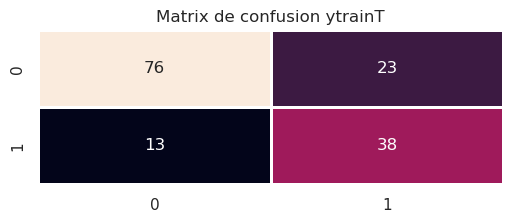

In [241]:
# b.	Obtener la matriz de confusión.

# ************* Inlcuye aquí tu código:**************************
plt.figure(figsize=(6, 2))
f_matrix_ytest = confusion_matrix(ytest, predict1)
plt.title('Matrix de confusion ytrainT')
target_names = ['class 0, NO', 'class 1, YES']
print(classification_report(ytest, predict1, target_names=target_names))
sns.heatmap(f_matrix_ytest, linewidths=1, annot=True, fmt='g', cbar=False,)

plt.show

# *********** Aquí termina la sección de agregar código *************

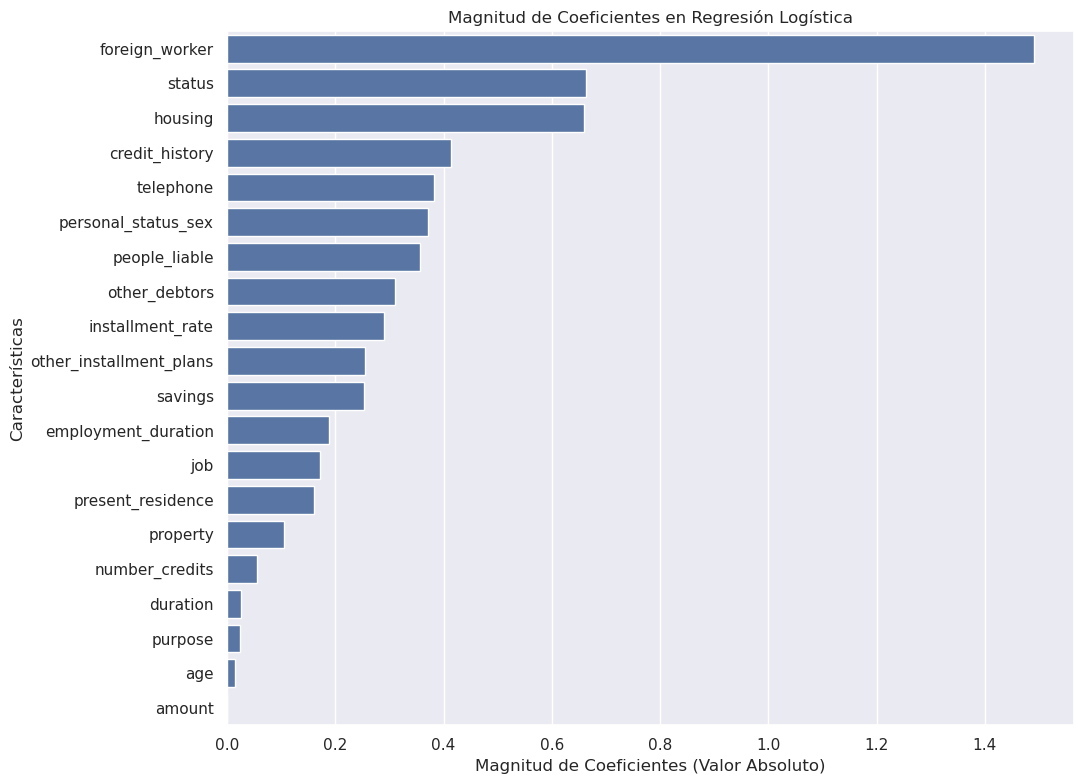

In [242]:
# c.	Realiza un análisis de importancia de variables (feature importance) de este
# mejor modelo con el conjunto de prueba (test) e incluye tus conclusiones al respecto.

# ************* Inlcuye aquí tu código:**************************

coeficientes = lr_hiper.coef_[0]

# Crear un DataFrame para almacenar los coeficientes junto con el nombre de las características
features = Xtest.columns  # Supongamos que X_train es un DataFrame de pandas
coeficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coeficientes})

# Calcular la magnitud de los coeficientes (valor absoluto)
coeficients_df['Magnitude'] = coeficients_df['Coefficient'].abs()

# Ordenar el DataFrame por magnitud de coeficientes de mayor a menor
coeficients_df = coeficients_df.sort_values(by='Magnitude', ascending=False)

plt.figure(figsize=(11, 8))
sns.barplot(x='Magnitude', y='Feature', data=coeficients_df)

# Agregar título y etiquetas de ejes
plt.title('Magnitud de Coeficientes en Regresión Logística')
plt.xlabel('Magnitud de Coeficientes (Valor Absoluto)')
plt.ylabel('Características')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# *********** Aquí termina la sección de agregar código *************

## **Ejercicio 15**

### **Escribe tus conclusiones finales de la actividad. En particular puedes comparar tus resultados con los que se muestran en el artículo de la IEEE.**   

### ++++++++ Inicia la sección de agregar texto: +++++++++++
Logistic regresion  no está en la tabla de la IEEE y el mayor racall que tienen entre los diferentes modelos es del 73 %. Logistic regresion con el grid search, logro el 75 como mínimo y 78 como máximo en recall. Lo cual supera a los modelos utilizados en la IEEE. Ademas hay un balance entre Prescision y recall lo cula me deja satisfecho en el nivel de presicion que obtuve.


### ++++++++ Termina la sección de agregar texto. +++++++++++


>> ###**Fin de la Actividad de las Semanas 5 y 6.**